# ⚡ Grupo 4 - Comisión 25565 ⚡
# SEGUNDA ENTREGA DEL PROYECTO FINAL

**1) Presentación de la empresa, organización o problema específico. 🔸**

A modo de introduccióon y ya que , luego de una gran búsqueda con el objetivo de identificar un problema concreto de la vida real y lograr aportar valor a la solución del mismo, identificamos que en el área de salud, la aplicación del Machine Learning es muy incipiente , por lo cual nos propusimos empezar a investigar cual problematica podríamos abordar. Entre tantas, nos pareció muy interesante tratar uno de los problemas mas comunes dentro de la cardiología, **enfermedades del corazón** 💓. 
\
Por lo tanto , hemos elegido trabajar con los datos de importantes Instituciones cardiológicas 🏪 de diferentes partes del mundo, como por ejemplo el Instituto Húngaro de Cardiología de Budapest, Hospitales Universitarios en Zurich y Basel, Suiza y la Clínica Cleveland en Long Beach , las cuales también se encuentran con el interés de recibir ayuda e implemetar este tipo de soluciones para sus problemas, obviamente de la mano de los Datos.



**2)Preguntas y objetivos de la investigación.🔸**\
**Preguntas**
>**A)** ¿La combinación de algunos de estos factores de riesgo (features) , puede ocasionar una enfermedad de corazón? \
**B)** ¿La muestra representada en este dataset refleja objetivamente a todos los tipos de personas que componen la población en relación a su estado de salud? Es decir , personas sanas, en riesgo y enfermas. \
**C)** ¿Cuales son los patrones de consulta más frecuente por lo que los pacientes consultan a Cardiología? \
**D)** ¿Existe algún otro feature que hoy no estamos teniendo en cuenta y posiblemente aportaría más predictibilidad al estudio?

*(#) Según bibliografía consultada ,consideramos "FACTOR DE RIESGO" a los features que tiene valores sobre los valores normales. Más adelante en la sección donde detallamos información sobre las columnas podrán consultar tabla con dichos valores.*

**Problema**:\
🔹Ausencia de una herramienta que nos permita detectar enfermedades cardíacas con anticipación de manera metódica y sistemática y sobre todo basada en datos.

**Objetivos:**
>🎯Determinar y entender la relación entre estos factores de riesgo (features) y la ocurrencia o no de una enfermedad cardíaca.\
🎯Adquirir, explorar y transformar los datos recabados de una manera inteligente y eficiente para lograr óptimos resultados.\
🎯Aportar un modelo predictivo (de clasificación) que les sirva como herramienta para poder predecir , de una manera de manera más ágil, dentro de la comunidad y poder tomar acciones preventivas y políticas dinámicas de salud para favorecer a la población.


**3) Conformación del equipo de trabajo.🔸**\
 \
Somos un grupo interdisciplinario de tres personas con la idea de poder aportar soluciones de valor a organizaciones de diferente índole. Inicialmente , para conformar el equipo, nos basamos en poder tener miembros de distintas disciplinas y que tengan como objetivo principal poder hacer un trabajo que realmente aporte valor y no solamente como un requisito académico. \
Somos Liliya 👩, Mariano 👨 y Nicolas 🧑.



**4) Indicación de la fuente del dataset y los criterios de selección (Data Acquisition).** \
En este desafío que nos propusimos nos dimos cuenta la dificultad para encontrar dataset que reflejen hechos o problemas reales del ámbito de la cardiología. Aún así el dataset elegido nos permite aplicar los conocimientos adquiridos , aportar valor con nuestro análisis y poder reflexionar sobre los resultados. \
El principal criterio de selección que nos interesó fue la composición de los diferentes features y la existencia de aquellos el cual por su especifidad nos brindan material óptimo para un buen análisis. Por otra parte la casi nula ausencia de datos faltantes fue otro criterio no menos importante para la elección. \
Para este trabajo utilizamos datos creados por las siguientes fuentes: \
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
[Link](https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7)

**5) A continuación realizamos el proceso de Data Acquisition:**

**Comenzamos por importar las librerías necesarias:** \
(#) A continuación adjuntamos la opción de una herramienta muy potente como es el Pandas Profiling, la cual optamos en esta instancia no utilizarla.\
*Se debe instalar la siguiente versión de Pandas para luego instalar el Pandas Profiling.*\
!pip install "pandas==1.1.03"\
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.patches as mpatches


# Visualizacion de Datos
import matplotlib.pyplot as plt
import seaborn as sns

**6) Ahora llega el momento de leer el dataframe , mostrar algunos resultados y verificar la cantidad de registros y columnas del mismo:**

In [3]:
data_raw = pd.read_csv('dataset_heart_disease.csv')
data_raw.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,Typical angina,125,212,0,ST-T Wave abnormality,168,Yes,1.0,Downsloping,2,Reversible defect,0
1,53,Male,Typical angina,140,203,1,Normal,155,No,3.1,Upsloping,0,Reversible defect,0
2,70,Male,Typical angina,145,174,0,ST-T Wave abnormality,125,No,2.6,Upsloping,0,Reversible defect,0
3,61,Male,Typical angina,148,203,0,ST-T Wave abnormality,161,Yes,0.0,Downsloping,1,Reversible defect,0
4,62,Female,Typical angina,138,294,1,ST-T Wave abnormality,106,Yes,1.9,Flat,3,Normal blood flow,0
5,58,Female,Typical angina,100,248,0,Normal,122,Yes,1.0,Flat,0,Normal blood flow,1
6,58,Male,Typical angina,114,318,0,LV hypertrophy,140,Yes,4.4,Upsloping,3,Fixed defect,0
7,55,Male,Typical angina,160,289,0,Normal,145,No,0.8,Flat,1,Reversible defect,0
8,46,Male,Typical angina,120,249,0,Normal,144,Yes,0.8,Downsloping,0,Reversible defect,0
9,54,Male,Typical angina,122,286,0,Normal,116,No,3.2,Flat,2,Normal blood flow,0


In [4]:
data_raw.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,Male,Atypical angina,140,221,0,ST-T Wave abnormality,164,No,0.0,Downsloping,0,Normal blood flow,1
1021,60,Male,Typical angina,125,258,0,Normal,141,No,2.8,Flat,1,Reversible defect,0
1022,47,Male,Typical angina,110,275,0,Normal,118,No,1.0,Flat,1,Normal blood flow,0
1023,50,Female,Typical angina,110,254,0,Normal,159,Yes,0.0,Downsloping,0,Normal blood flow,1
1024,54,Male,Typical angina,120,188,0,ST-T Wave abnormality,113,Yes,1.4,Flat,1,Reversible defect,0


In [5]:
print(f"El dataframe tiene la siguiente dimensión (registros;columnas): {data_raw.shape}")

El dataframe tiene la siguiente dimensión (registros;columnas): (1025, 14)


**7) Ahora es necesario verificar los tipos de datos en cada columna:**

In [6]:
data_raw.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs           int64
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target        int64
dtype: object

**8) Con la siguiente función *.info()* nos enteramos de más información sobre nuestro dataframe inicial:**

In [7]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   object 
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 112.2+ KB


**9) Verificamos la cantidad de registros con valores Nan , por cada columna:** 

In [8]:
data_raw.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**10) Verificamos el rango etario del dataset, esto es importante porque varios features representan signos vitales, por tanto, 
los valores van a ser diferentes en adultos que en menores.**

**Opción A:**

In [9]:
print(f'La cantidad de registros del dataframe original es:{data_raw.shape[0]}')
filtrado = data_raw[data_raw['age']>18]
print(f'La cantidad de registros del dataframe filtrado por edades mayores a 18 años es:{filtrado.shape[0]}')

La cantidad de registros del dataframe original es:1025
La cantidad de registros del dataframe filtrado por edades mayores a 18 años es:1025


**Opción B:**

In [10]:

edad_min = min(data_raw['age'])
edad_max = max(data_raw['age'])
print(f'La edad más baja en el dataframe es :{edad_min},y la edad más alta es:{edad_max}')

La edad más baja en el dataframe es :29,y la edad más alta es:77


**11)Vemos la longitud del dataset:**

In [11]:
print(len(data_raw))

1025


**12) A continuación comenzamos con el Data Wrangling:**

**En primer lugar, aclararemos el significado de cada columna del dataset y traduciremos los valores que puedan tomar:**

-**Age** : Edad de la persona.

-**Sex** : Sexo de la persona (male, female).

-**cp**: Tipo de dolor de pecho de la persona (typical angina,atypical angina,non-anginal pain and asymptomatic) - (Angina típica, Angina atípica, Dolor no anginoso y Asintomático)

-**trestbps**: Presión de sangre de la persona en reposo en el momento de la admisión [mm/Hg ] (Valor min:80 ; max:120)

-**chol**:  Colesterol de la persona en [mg/dl] (Valor min:120 ; Valor max:200)

-**fbs**: Glucemia de la persona en ayunas. (Si es > 120 mg/dl, 1 = Verdadero; 0 = Falso).  

-**restecg**: Resultados electrocardiográficos de la persona en reposo. (Valores: Normal,having ST-T wave abnormality,showing probable or definite left ventricular hypertrophy): 

-**thalach**: Frecuencia cardíaca máxima alcanzada de la persona. (El ritmo normal en reposo es de 60 a 100 pulsaciones por minuto)

-**exang**: Angina inducida por el ejercicio. (Valores: Yes-No)

-**Oldpeak** = Depresión del ST inducida por el ejercicio en relación con el reposo.  

-**slope**: Pendiente máxima del segmento ST en ejercicio.(Valores: Upsloping, flat, downsloping)

-**ca**: Número de vasos principales coloreados por fluoroscopia (Valores: 0-3).

-**thal**: Indica un trastorno de la sangre llamado Talasemia.\
Valores: \
-fixed defect (no blood flow in some part of the heart): Defecto fijo. Ausencia de flujo sanguíneo en alguna parte del corazón\
-normal blood flow: Flujo normal de sangre\
-reversible defect (a blood flow is observed but it is not normal): Defecto reversible (se observa un flujo sanguíneo pero no es normal).

-**target** : Variable a predecir. Si tiene o no enfermedad del corazón.(Valores: 0 = no, 1 = yes)

**13) A continuación comenzamos con el Data Wrangling:**

**Antes de empezar con en análisis del data frame y la relación de los features, vamos a renombrar las columnas para poder identificarlas de manera más rápida a la hora del análisis:**

In [12]:
name_labels={
    'age' : 'edad',
    'sex' : 'sexo',
    'cp' : 'dolor_de_pecho',
    'trestbps' : 'presion_en_reposo',
    'chol' : 'colesterol_mg_dl',
    'fbs' : 'glucemia_en_ayunas',
    'restecg' : 'resultados_electrocardiograficos_en_reposo',
    'thalach' : 'frecuencia_cardiaca_maxima_alcanzada',
    'exang' : 'angina_por_ejercicio',
    'oldpeak' : 'depresion_st_ejercicio_segun_reposo',
    'slope' : 'maxima_pendiente_st_ejercicio',
    'ca' : 'vasos_principales_coloreados',
    'thal' : 'talasemia',
    'target' : 'enfermo_cardiaco'
}

df_labeled = data_raw.rename(columns=name_labels).copy()

**Luego, identificamos en la columna Talasemia y en Vasos_principales_coloreados , valores "0" (en talasemia) y "4" (en vasos principales) que debemos eliminarlos. Según la fuente de datos son valores incorrectos que no se deben tener en cuenta:**

In [13]:
df_labeled = df_labeled[df_labeled.talasemia != '0']

In [14]:
df_labeled = df_labeled[df_labeled.vasos_principales_coloreados != 4]

**Verificamos que realmente hayamos eliminado dichos registros:**

In [15]:
df_labeled[df_labeled["talasemia"]=="0"]

,edad,sexo,dolor_de_pecho,presion_en_reposo,colesterol_mg_dl,glucemia_en_ayunas,resultados_electrocardiograficos_en_reposo,frecuencia_cardiaca_maxima_alcanzada,angina_por_ejercicio,depresion_st_ejercicio_segun_reposo,maxima_pendiente_st_ejercicio,vasos_principales_coloreados,talasemia,enfermo_cardiaco


In [16]:
df_labeled[df_labeled["vasos_principales_coloreados"]=="4"]

,edad,sexo,dolor_de_pecho,presion_en_reposo,colesterol_mg_dl,glucemia_en_ayunas,resultados_electrocardiograficos_en_reposo,frecuencia_cardiaca_maxima_alcanzada,angina_por_ejercicio,depresion_st_ejercicio_segun_reposo,maxima_pendiente_st_ejercicio,vasos_principales_coloreados,talasemia,enfermo_cardiaco


**14) Ahora toca el trabajo sobre EDA y análisis univariado,bivariado y multivariado**

**A continuación convertiremos las variables cualitativas en cuantivativas con el uso de get_dummies:**

In [17]:
dummies = pd.get_dummies(df_labeled[['sexo','angina_por_ejercicio']],drop_first=True)
df_labeled = pd.concat([df_labeled.drop(['sexo','angina_por_ejercicio'],axis=1), dummies],axis=1)

In [18]:
label_encoder = preprocessing.LabelEncoder()

df_labeled['dolor_de_pecho'] = label_encoder.fit_transform(df_labeled['dolor_de_pecho'])
df_labeled['resultados_electrocardiograficos_en_reposo'] = label_encoder.fit_transform(df_labeled['resultados_electrocardiograficos_en_reposo']) 
df_labeled['maxima_pendiente_st_ejercicio'] = label_encoder.fit_transform(df_labeled['maxima_pendiente_st_ejercicio']) 
df_labeled['talasemia'] = label_encoder.fit_transform(df_labeled['talasemia']) 
df_labeled

,edad,dolor_de_pecho,presion_en_reposo,colesterol_mg_dl,glucemia_en_ayunas,resultados_electrocardiograficos_en_reposo,frecuencia_cardiaca_maxima_alcanzada,depresion_st_ejercicio_segun_reposo,maxima_pendiente_st_ejercicio,vasos_principales_coloreados,talasemia,enfermo_cardiaco,sexo_Male,angina_por_ejercicio_Yes
0,52,3,125,212,0,2,168,1.0,0,2,2,0,1,1
1,53,3,140,203,1,1,155,3.1,2,0,2,0,1,0
2,70,3,145,174,0,2,125,2.6,2,0,2,0,1,0
3,61,3,148,203,0,2,161,0.0,0,1,2,0,1,1
4,62,3,138,294,1,2,106,1.9,1,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,2,164,0.0,0,0,1,1,1,0
1021,60,3,125,258,0,1,141,2.8,1,1,2,0,1,0
1022,47,3,110,275,0,1,118,1.0,1,1,1,0,1,0
1023,50,3,110,254,0,1,159,0.0,0,0,1,1,0,1


**A continuación luego de realizar el Pre-procesamiento y EDA del dataframe, podemos obtener el dataframe final listo para utilizarlo como imput en los modelos a desarrollar.**

In [19]:
df_final_heart_disease = df_labeled
df_final_heart_disease

,edad,dolor_de_pecho,presion_en_reposo,colesterol_mg_dl,glucemia_en_ayunas,resultados_electrocardiograficos_en_reposo,frecuencia_cardiaca_maxima_alcanzada,depresion_st_ejercicio_segun_reposo,maxima_pendiente_st_ejercicio,vasos_principales_coloreados,talasemia,enfermo_cardiaco,sexo_Male,angina_por_ejercicio_Yes
0,52,3,125,212,0,2,168,1.0,0,2,2,0,1,1
1,53,3,140,203,1,1,155,3.1,2,0,2,0,1,0
2,70,3,145,174,0,2,125,2.6,2,0,2,0,1,0
3,61,3,148,203,0,2,161,0.0,0,1,2,0,1,1
4,62,3,138,294,1,2,106,1.9,1,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,2,164,0.0,0,0,1,1,1,0
1021,60,3,125,258,0,1,141,2.8,1,1,2,0,1,0
1022,47,3,110,275,0,1,118,1.0,1,1,1,0,1,0
1023,50,3,110,254,0,1,159,0.0,0,0,1,1,0,1


**A continuación vemos medidas de tendencia central de los features númericos que tiene nuestro dataframe:**

In [20]:
df_final_heart_disease.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,1000.0,54.6070,9.037822,29.0,48.0,56.0,61.0,77.0
dolor_de_pecho,1000.0,2.1730,0.965403,0.0,2.0,2.0,3.0,3.0
presion_en_reposo,1000.0,131.5920,17.714326,94.0,120.0,130.0,140.0,200.0
colesterol_mg_dl,1000.0,246.9960,51.700802,126.0,211.0,240.5,277.0,564.0
glucemia_en_ayunas,1000.0,0.1460,0.353283,0.0,0.0,0.0,0.0,1.0
resultados_electrocardiograficos_en_reposo,1000.0,1.4790,0.528998,0.0,1.0,1.0,2.0,2.0
frecuencia_cardiaca_maxima_alcanzada,1000.0,148.9770,23.083139,71.0,132.0,152.0,165.0,202.0
depresion_st_ejercicio_segun_reposo,1000.0,1.0924,1.180727,0.0,0.0,0.8,1.8,6.2
maxima_pendiente_st_ejercicio,1000.0,0.6190,0.619857,0.0,0.0,1.0,1.0,2.0
vasos_principales_coloreados,1000.0,0.7010,0.944718,0.0,0.0,0.0,1.0,3.0


**Comenzamos graficando un heatmap para ver la correlación entre las variables:**

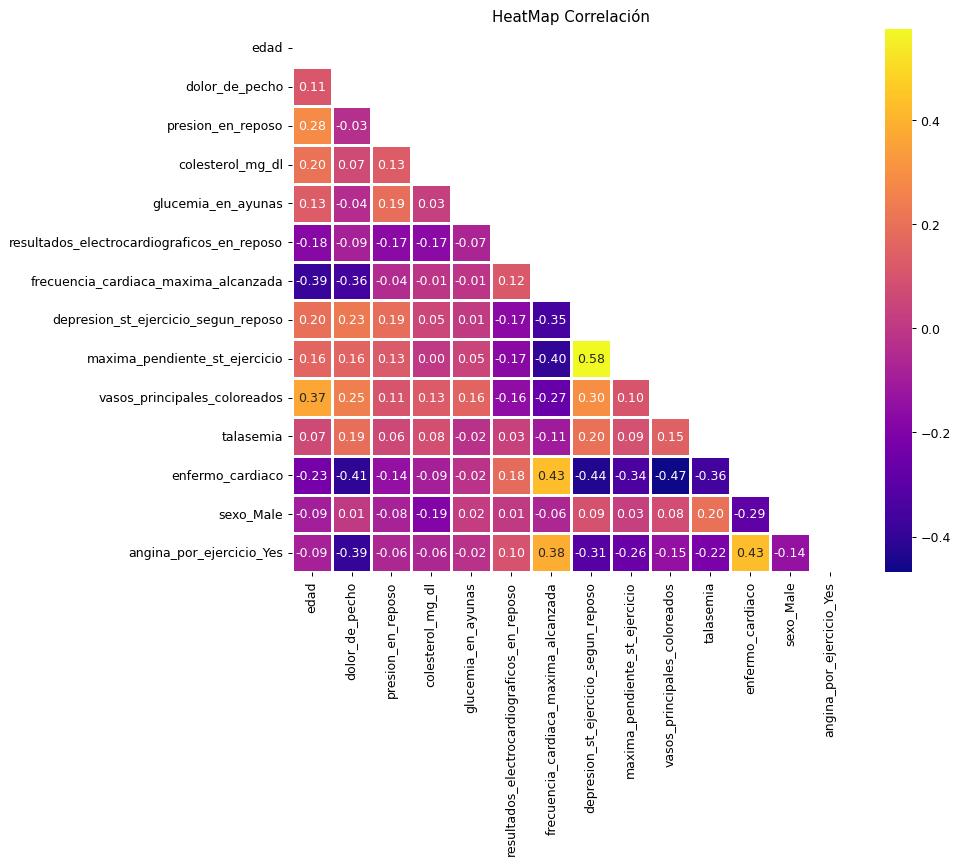

In [21]:
plt.figure(dpi = 90,figsize= (10,8))
mask = np.triu(np.ones_like(df_final_heart_disease.corr(),dtype = bool))
sns.heatmap(df_final_heart_disease.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('HeatMap Correlación')
plt.show()

**En la linea a continuación, debido a la transformación de variables categoricas a numericas, la funcion renombra automaticamente las columnas por lo que vimos que debemos volver a renombrar las siguientes:**

In [22]:
df_final_heart_disease = df_final_heart_disease.rename(columns={'sexo_Male':'sexo','angina_por_ejercicio_Yes':'angina_por_ejercicio'})

**Comenzamos con los gráficos del analisis Univariado:**

**Cada gráfico contiene un Title el cual nos ayuda a conocer la comprensión de las variables graficadas para analizar:**

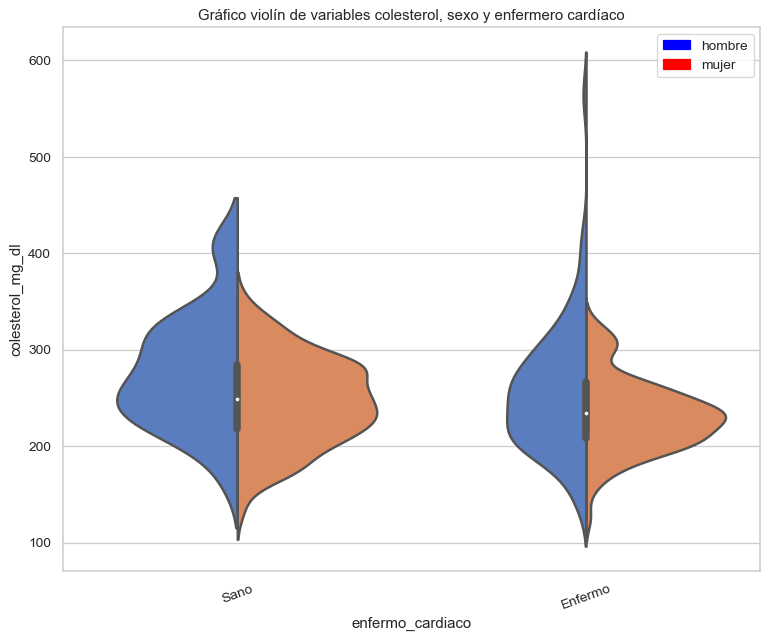

In [23]:
plt.figure(dpi = 90,figsize= (10,8))
sns.set(style="whitegrid")
sns.violinplot(x='enfermo_cardiaco', y='colesterol_mg_dl', hue='sexo',data=df_final_heart_disease,split=True,palette="muted",linewidth = 2)
label_mujer = mpatches.Patch(color='red', label='mujer')
label_hombre = mpatches.Patch(color='blue', label='hombre')
plt.legend(handles=[label_hombre,label_mujer])
plt.yticks(rotation = 0)
plt.xticks([0, 1], ['Sano', 'Enfermo'], rotation=20)  
plt.title('Gráfico violín de variables colesterol, sexo y enfermero cardíaco')
plt.show()

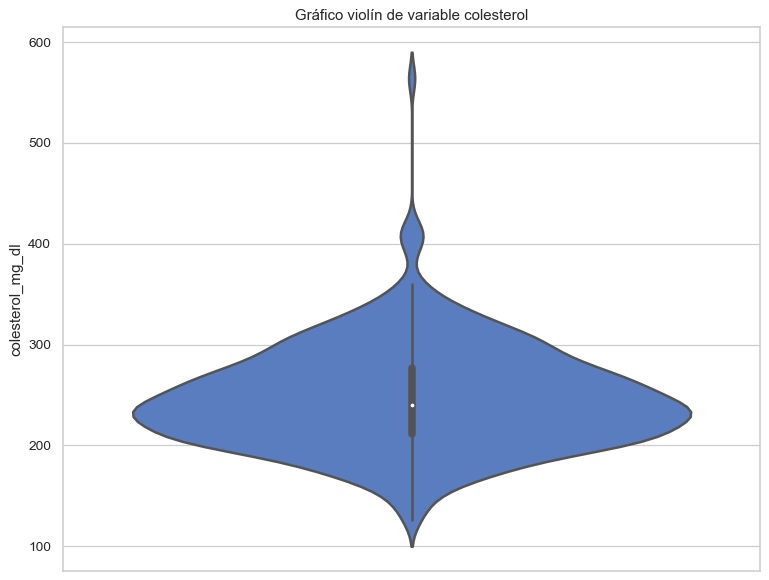

In [24]:
plt.figure(dpi = 90,figsize= (10,8))
sns.set(style="whitegrid")
sns.violinplot(y='colesterol_mg_dl',data=df_final_heart_disease,palette="muted",linewidth = 2)
plt.title('Gráfico violín de variable colesterol')
plt.show()

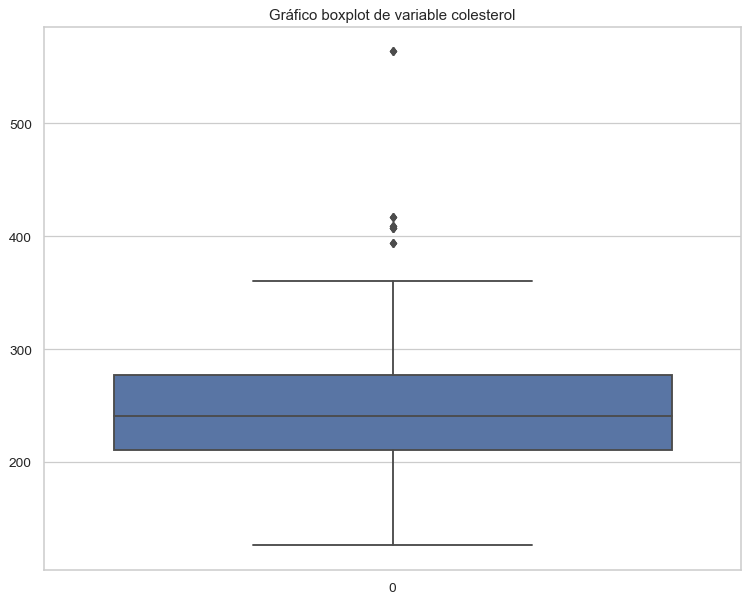

In [25]:
plt.figure(dpi = 90,figsize= (10,8))
sns.boxplot(data=df_final_heart_disease.colesterol_mg_dl, orient="v")
plt.title('Gráfico boxplot de variable colesterol')
plt.show()

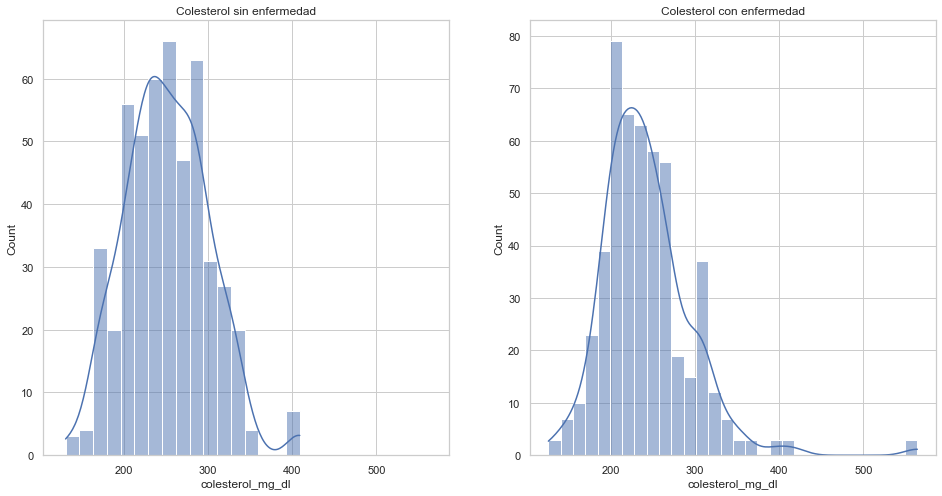

In [26]:
fig, axes= plt.subplots(figsize=(16,8),ncols=2, sharex='all')
sns.histplot(data= df_final_heart_disease[df_final_heart_disease.enfermo_cardiaco==0], x='colesterol_mg_dl', kde=True, ax= axes[0])
axes[0].set_title("Colesterol sin enfermedad")
sns.histplot(data= df_final_heart_disease[df_final_heart_disease.enfermo_cardiaco==1], x='colesterol_mg_dl', kde=True, ax=axes[1])
axes[1].set_title("Colesterol con enfermedad")
plt
plt.show()

**Realizamos la tabla de frecuencias:**

In [27]:
def df_frecuencias(df_final_heart_disease):
    df_frec_colesterol = pd.DataFrame(df_final_heart_disease['colesterol_mg_dl'].value_counts())
    df_frec_colesterol2 = df_frec_colesterol.rename(columns={'colesterol_mg_dl':'frecuencia abs'})
    total = df_frec_colesterol2['frecuencia abs'].sum()
    df_frec_colesterol2['frec abs acum'] = df_frec_colesterol2['frecuencia abs'].cumsum()
    df_frec_colesterol2['frec relativa'] = df_frec_colesterol2['frecuencia abs'].apply(lambda x: x/total)
    df_frec_colesterol2['frec relativa acum']= df_frec_colesterol2['frec relativa'].cumsum()
    return df_frec_colesterol2

df_frec = df_frecuencias(df_final_heart_disease)
df_frec

,frecuencia abs,frec abs acum,frec relativa,frec relativa acum
234,21,21,0.021,0.021
197,19,40,0.019,0.040
212,18,58,0.018,0.058
204,17,75,0.017,0.075
254,17,92,0.017,0.092
...,...,...,...,...
247,3,988,0.003,0.988
409,3,991,0.003,0.991
200,3,994,0.003,0.994
242,3,997,0.003,0.997


**Comenzamos a realizar el análisis Bivariado:**

**Para comenzar, elegimos las variables sexo , colesterol y target(Variable que nos indica si tienen o no la enfermedad):**

Text(0.5, 1.0, 'Relacion entre edad del individuo, colesterol y si padece o no la enfermedad')

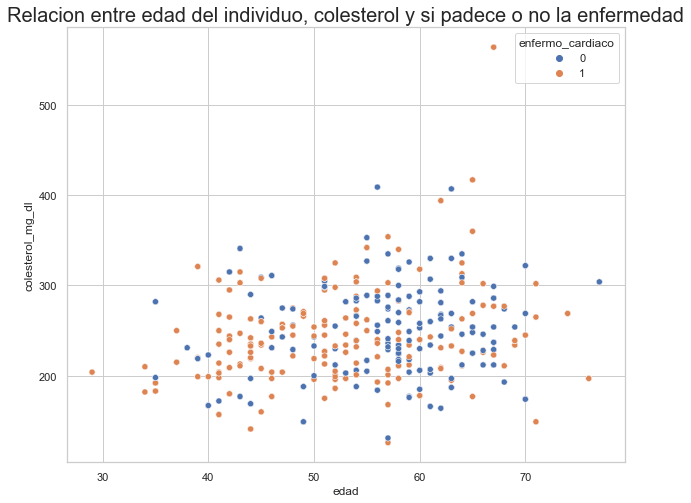

In [28]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="edad", y="colesterol_mg_dl",hue="enfermo_cardiaco", data=df_final_heart_disease)
plt.title('Relacion entre edad del individuo, colesterol y si padece o no la enfermedad', fontsize = 20, fontweight = 30)

**Conclusión: No se visualiza relación directa entre colesterol y la edad de los pacientes para la existencia de la enfermedad.**

**Ahora, elegimos analizar la correlación entre variable edad y colesterol de las personas:**

<AxesSubplot:xlabel='edad', ylabel='colesterol_mg_dl'>

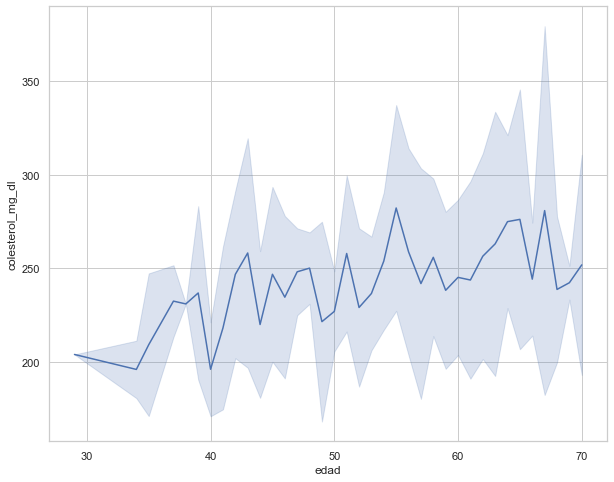

In [29]:
plt.figure(figsize=(10,8))
sns.lineplot(x="edad", y="colesterol_mg_dl", data=df_final_heart_disease[df_labeled['edad'] <= 70], ci='sd')

**Conclusión: Visualizamos que hay cierta correlación aunque hay mucho desvío estandar.**

**A continuación elegimos analizar la variable Presion arterial por cada target:**

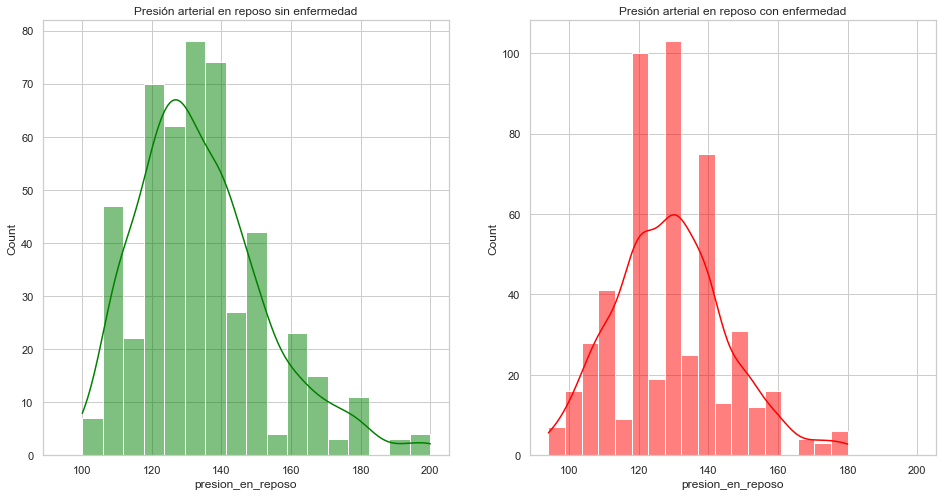

In [30]:
fig, axes= plt.subplots(figsize=(16,8),ncols=2, sharex='all')
sns.histplot(data= df_final_heart_disease[df_final_heart_disease.enfermo_cardiaco==0], x='presion_en_reposo', kde=True, ax= axes[0],color="green")
axes[0].set_title("Presión arterial en reposo sin enfermedad")
sns.histplot(data= df_final_heart_disease[df_final_heart_disease.enfermo_cardiaco==1], x='presion_en_reposo', kde=True, ax=axes[1],color="red")
axes[1].set_title("Presión arterial en reposo con enfermedad")
plt.show()

**Conclusión: Vemos que no podemos analizar o sacar una conclusión muy relevante excepto que en el caso de personas con la enfermedad tenemos 3 grupos notables con grados de presión por encima del común saludable (>120 p).**

**Ahora a continuación utilizamos el siguiente grafico para analizar cuantas personas padecen la enfermedad distinguido por sexo:**

([<matplotlib.axis.XTick at 0x2176573c550>,
 [Text(0, 0, 'Sano'), Text(1, 0, 'Enfermo')])

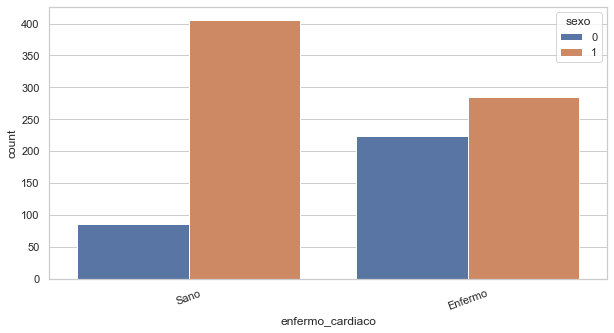

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(x=df_labeled['enfermo_cardiaco'],hue='sexo',data=df_final_heart_disease)
plt.xticks([0, 1], ['Sano', 'Enfermo'], rotation=20) 

**Conslusión: Vemos que hay mayor cantidad de hombres que padecen la enfermedad antes que mujeres. Para el grupo sin enfermedad, la cantidad de hombre crece sustancialmente. Podemos pensar que es un ejemplo de desbalance en el muestreo. Por ello realizamos la siguiente verificación:**

In [32]:
df_final_heart_disease.sexo.value_counts(normalize=True)

1    0.691
0    0.309
Name: sexo, dtype: float64

In [33]:
df_final_heart_disease.groupby('sexo')['enfermo_cardiaco'].value_counts(normalize=True).sort_values()

sexo  enfermo_cardiaco
0     0                   0.278317
1     1                   0.412446
      0                   0.587554
0     1                   0.721683
Name: enfermo_cardiaco, dtype: float64

**Por un lado vemos que un 70% pertenece a pacientes hombres. Por otro lado vemos que el mayor porcentaje de personas enfermas son mujeres.**

**Ahora a continuación y para finalizar , hacemos un groupby para visualizar por cada categoria de target, cual es el valor máximo de colesterol y presión arterial, luego graficamos:**

In [34]:
df_final_heart_disease_groupby_col_pres_max = df_final_heart_disease.groupby(['enfermo_cardiaco']).max()[['colesterol_mg_dl',	'presion_en_reposo']]
df_final_heart_disease_groupby_col_pres_max

,colesterol_mg_dl,presion_en_reposo
enfermo_cardiaco,,
0,409,200
1,564,180


([<matplotlib.axis.XTick at 0x2176563b2b0>,
 [Text(0, 0, 'Sano'), Text(1, 0, 'Enfermo')])

<Figure size 1440x1440 with 0 Axes>

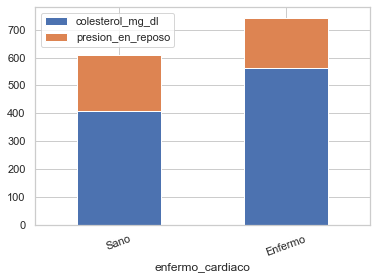

In [35]:
plt.figure(figsize=(20,20))
df_final_heart_disease_groupby_col_pres_max.plot.bar(stacked=True)
plt.xticks([0, 1], ['Sano', 'Enfermo'], rotation=20)

**Conclusión: Vemos que para el grupo de personas que padece la enfermedad hay un valor muy alto de colesterol y curiosamente para la presión arterial hay un caso máximo en el grupo sin enfermedad.**

**A continuación realizamos lo mismo pero en lugar de visualizar el valor máximo, visualizamos el promedio:**

In [36]:
df_final_heart_disease_groupby_col_pres_mean = df_final_heart_disease.groupby(['enfermo_cardiaco']).mean()[['colesterol_mg_dl',	'presion_en_reposo']]
df_final_heart_disease_groupby_col_pres_mean

,colesterol_mg_dl,presion_en_reposo
enfermo_cardiaco,,
0,251.703252,134.168699
1,242.437008,129.096457


([<matplotlib.axis.XTick at 0x2176552a550>,
 [Text(0, 0, 'Sano'), Text(1, 0, 'Enfermo')])

<Figure size 360x360 with 0 Axes>

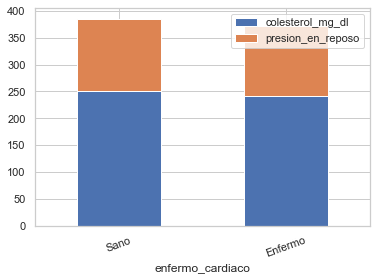

In [37]:
plt.figure(figsize=(5,5))
df_final_heart_disease_groupby_col_pres_mean.plot.bar(stacked=True)
plt.xticks([0, 1], ['Sano', 'Enfermo'], rotation=20)

**Conslusión: Vemos que curiosamente , tanto el promedio mas alto de colesterol y presión arterial , lo tienen las personas que no padecen la enfermedad.**

**Luego de analizar dichas variables, elegimos las variables que según nos muestra el gráfico del Heatmap tienen más correlación con la variable dependiente "Enfermo cardiaco" (target):**

**En primer lugar "Dolor de pecho" vs "Enfermo cardiaco":**

([<matplotlib.axis.XTick at 0x21764dc1af0>,
 [Text(0, 0, 'Sano'), Text(1, 0, 'Enfermo')])

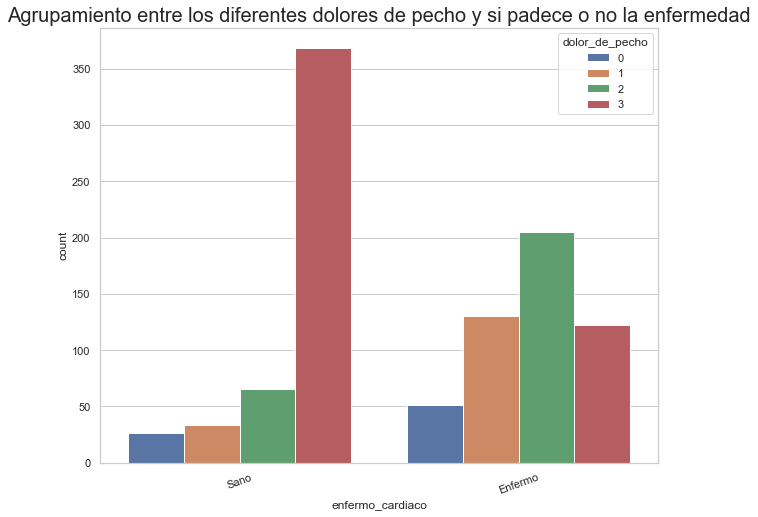

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(x=df_final_heart_disease['enfermo_cardiaco'],hue='dolor_de_pecho',data=df_final_heart_disease)
plt.title('Agrupamiento entre los diferentes dolores de pecho y si padece o no la enfermedad', fontsize = 20, fontweight = 30)
plt.xticks([0, 1], ['Sano', 'Enfermo'], rotation=20)

**Conclusion: Vemos que en las personas que no tienen la enfermedad, el dolor más frecuente es la angina tipica. Curiosamente, en el grupo de personas con la enfermedad cardiaca no presentan dolor anginoso de pecho.**

**Ahora analizaremos la variable Talasemia y si padece o no la enfermedad:**

([<matplotlib.axis.XTick at 0x21765808310>,
 [Text(0, 0, 'Sano'), Text(1, 0, 'Enfermo')])

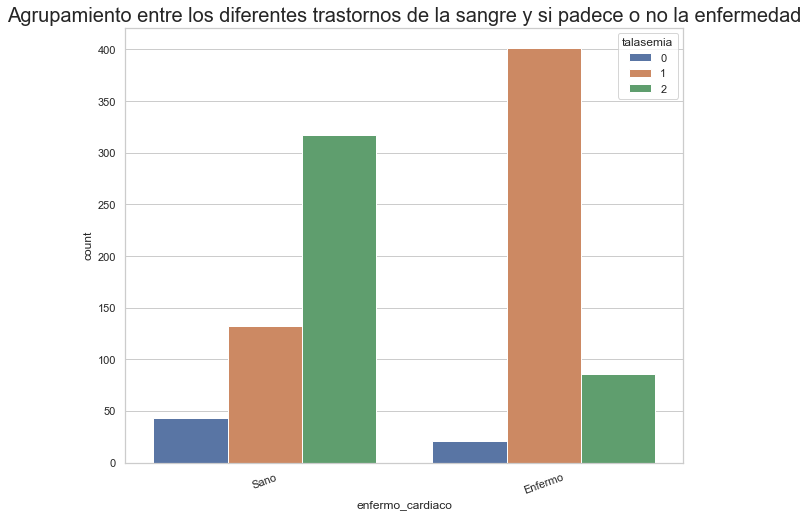

In [39]:
plt.figure(figsize=(10,8))
sns.countplot(x=df_final_heart_disease['enfermo_cardiaco'],hue='talasemia',data=df_final_heart_disease)
plt.title('Agrupamiento entre los diferentes trastornos de la sangre y si padece o no la enfermedad', fontsize = 20, fontweight = 30)
plt.xticks([0, 1], ['Sano', 'Enfermo'], rotation=20)

**Vemos que para el grupo de pacientes con enfermedad cardiaca, tienen un flujo normal de sangre, pero en contrapartido, los pacientes que no padecen enfermedad presentan un defecto reversible (se observa un flujo sanguíneo pero no es normal).**

**Por último , analizaremos la variable Maxima_pendiente_st_ejercicio y si padecen o no la enfermedad:**

([<matplotlib.axis.XTick at 0x2176576afa0>,
 [Text(0, 0, 'Sano'), Text(1, 0, 'Enfermo')])

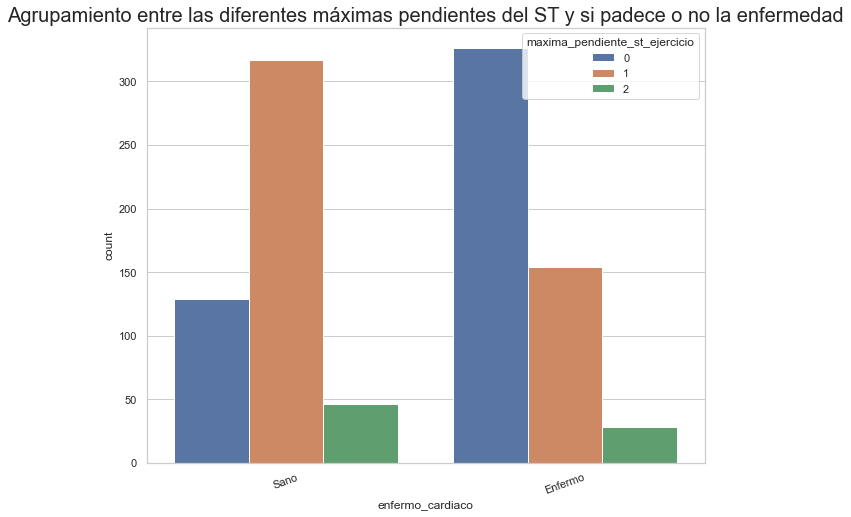

In [40]:
plt.figure(figsize=(10,8))
sns.countplot(x=df_final_heart_disease['enfermo_cardiaco'],hue='maxima_pendiente_st_ejercicio',data=df_final_heart_disease)
plt.title('Agrupamiento entre las diferentes máximas pendientes del ST y si padece o no la enfermedad', fontsize = 20, fontweight = 30)
plt.xticks([0, 1], ['Sano', 'Enfermo'], rotation=20)

**Concluimos que los pacientes con una enfermedad cardiaca presentan una pendiente del ST máxima en ejercicio Descendiente y en el grupo que no padecen la enfermedad, tienen un ST plano.**

**A continuación comenzamos el analisis Multivariado:**

**Realizamos un gráfico SCATTER PLOT para visualizar la correlación entre el Colesterol y la Presión sanguinea en reposo en el momento de la admisión al hospital:**

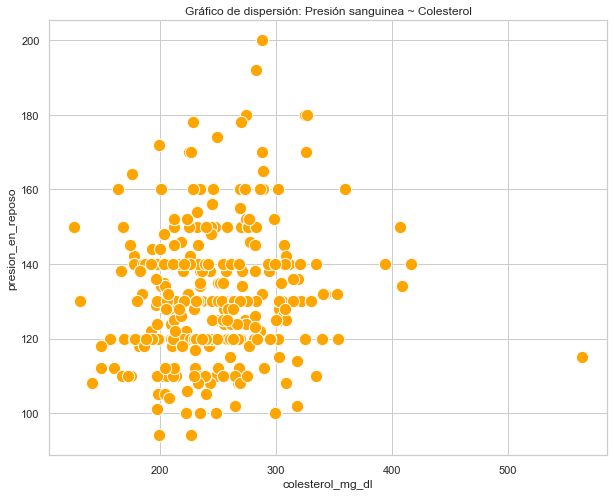

In [41]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="colesterol_mg_dl", y="presion_en_reposo", data=df_final_heart_disease, s= 150, color="orange")
plt.title('Gráfico de dispersión: Presión sanguinea ~ Colesterol') 
plt.show()

**En consiguiente adicionamos la variable SEXO para ver el comportamiento entre hombres y mujeres y dichos parametros anteriormente mencionados:**

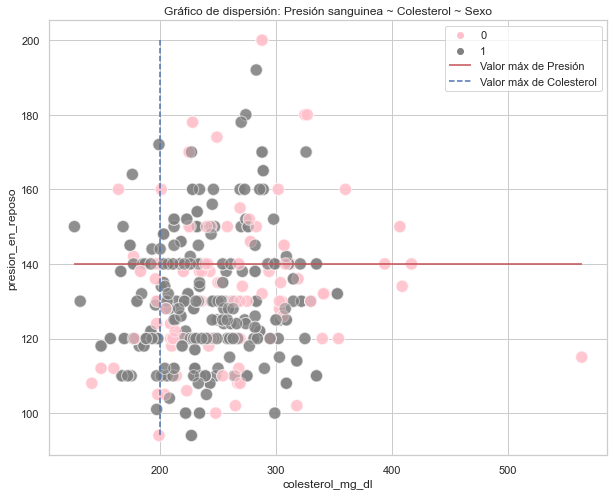

In [42]:
p={0:'pink',1:'gray'}
fig, ax=plt.subplots(figsize=(10,8))

sns.scatterplot(x="colesterol_mg_dl", y="presion_en_reposo", data=df_final_heart_disease,hue = 'sexo', s=150, palette=p, alpha=0.5)
ax.hlines(
    y=140,
    xmin=df_final_heart_disease['colesterol_mg_dl'].min(),
    xmax=df_final_heart_disease['colesterol_mg_dl'].max(),
    label='Valor máx de Presión',
    color='r'
)
ax.vlines(
    x=200,
    ymin=df_final_heart_disease['presion_en_reposo'].min(),
    ymax=df_final_heart_disease['presion_en_reposo'].max(),
    label='Valor máx de Colesterol',
    ls='--'
)
plt.title('Gráfico de dispersión: Presión sanguinea ~ Colesterol ~ Sexo') 
plt.legend()
plt.show()

**Conclusión gráfico SCATTER PLOT entre "presion_en_reposo" y "colesterol_mg_dl":**

> Como se puede ver anteriormente, graficamos una linea vertical (Valor Maximo de colesterol) y otra linea horizontal (Valor máx de presion) ya que nos pareció importante destacar dos puntos:


1.   Los valores máximos graficados a través de las lineas son los valores máximos admisibles en una persona sana o también llamados "Valores recomendados". Sobrepasando estos valores ya se entra en una etapa de cierto riesgo para el paciente, obviamente teniendo en cuenta también la magnitud del límite y el estado de las otras caracteristicas vitales. \
En el caso del colesterol existen 3 tipos de tablas con diferentes rangos de valores: "Personas de 19 años o menores", "Hombres de 20 años o mayores" y "Mujeres de 20 años o mayores". En todos los casos el valor máximo es 200 mg/dl. Para el caso de la presión sanguinea, la Presión arterial: límite de lo normal hasta 140 (mmHg) de presión sistólica.
2.   En segundo lugar, la idea era poder visualizar que el conjunto de datos de nuestro dataset posee la mayoría de pacientes con los límites sobrepasados en los dos features. Si bien entendemos que para la presión sanguinea hay que tener en cuenta que fue tomada y registrada al momento de la admisión del hospital pero vemos que evidentemente los valores sobrepasan ente límite en exceso.



**Ahora, realizamos el SCATTER PLOT pero con más variables. La diferenciamos con diferentes formas y colores y en dos gráficos separados.**

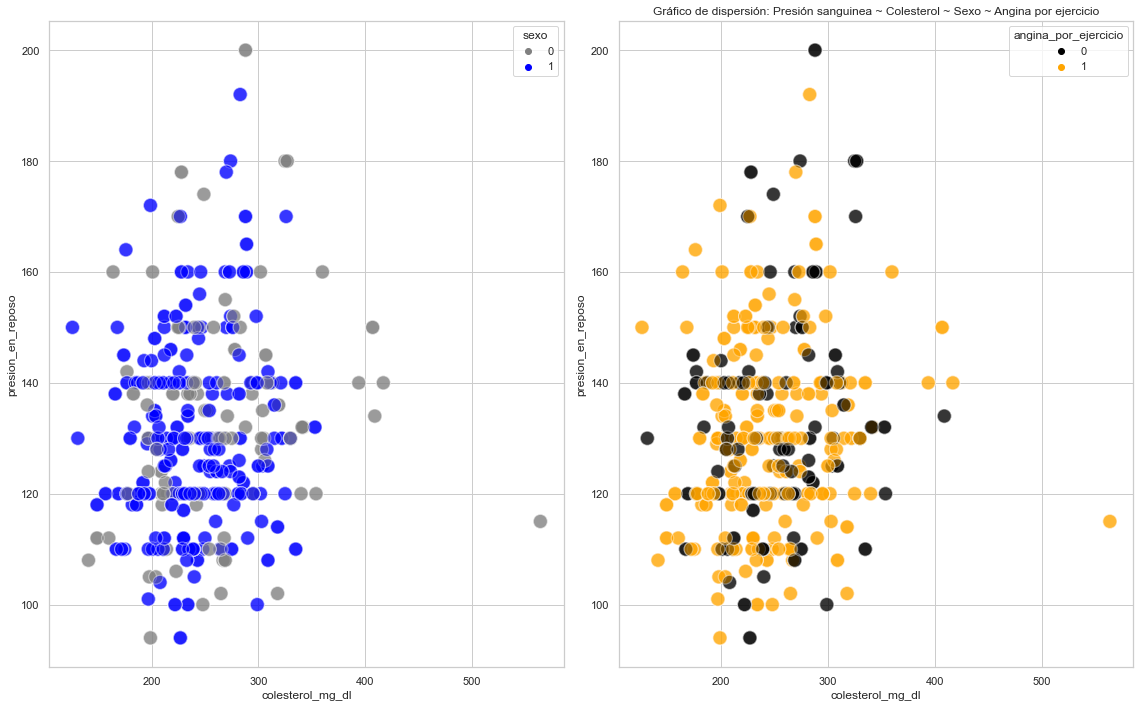

In [43]:
p={0:'gray',1:'blue'}
p_exag = {1:'orange',0:'black'}
fig,ax=plt.subplots(figsize=(16,10), ncols=2)
sns.scatterplot(x="colesterol_mg_dl", y="presion_en_reposo", data=df_final_heart_disease,hue = 'sexo', s=200, palette=p, alpha=0.4, ax=ax[0])
sns.scatterplot(x="colesterol_mg_dl", y="presion_en_reposo", data=df_final_heart_disease,hue = 'angina_por_ejercicio', s=200, palette=p_exag, alpha=0.4, ax=ax[1])
plt.title('Gráfico de dispersión: Presión sanguinea ~ Colesterol ~ Sexo ~ Angina por ejercicio')

plt.tight_layout()
plt.show()

**Conclusión: Podemos observar que no existe notable amplitud en la cantidad de hombres o mujeres para las apariciones en variables como el Colesterol y la presión. Por otro lado, vemos en el gráfico de la derecha que existe más cantidad de personas con angina por ejercicio existente pero sin importar su valor de Colesterol y presión.**

># **Conclusión final Etapa de Análisis Univariado, Bivariado y Multivariado: Gracias a esta primera instancia pudimos identificar los objetivos , las variables mas significativas y sus correlaciones con la variable dependiente y así comenzar a obtener un óptimo dataset donde aplicaremos el modelo predictivo a utilizar.**

**15) En la Etapa a continuación, comenzamos a preparar el dataset para comenzar a aplicar los modelos de Machine Learning 🤖, con el objetivo de predecir nuestra variable Target.** 

>**En nuestro caso, teniendo en cuenta el tipo de problema a resolver y nuestra variable TARGET, iremos a aplicar modelos de Clasificación. Luego de aplicarlos y revisar su comportamiento y eficiencia haremos elección de uno de ellos.**

**16) A modo de introducción, hablaremos y expondremos lo referido a Métricas para los modelos de Machine learning.**

> 🔢 **Las métricas nos van a permitir evaluar el modelo, podemos medir la calidad de nuestro modelo y podemos ver qué tan bien puede funcionar nuestro modelo con respecto a nuestro caso de uso.**

>**Las métricas más habituales son las siguientes:**

* **Exactitud o "Accuracy"**, recordar que este métrica no es la más adecuada a utilizar cuando tenemos dataset desbalanceados.

<img src=/content/1.png>

* **Matriz de confusión:** \
Recordemos

Hay cuatro términos importantes en una matriz de confusión:

* Verdaderos positivos (TP): estos son los casos en los que el "Sí" predicho en realidad pertenecía a la clase "Sí".
* Negativos verdaderos (TN): Estos son los casos en los que el “No” predicho en realidad pertenecía a la clase “No”.
* Falsos positivos (FP): estos son los casos en los que el "Sí" predicho en realidad pertenecía a la clase "No".
* Falsos negativos (FN): estos son los casos en los que el "No" predicho en realidad pertenecía a la clase "Sí".

<img src=2.png>

* **Precisión:** La precisión es la proporción de verdaderos positivos (TP) por la suma de verdaderos positivos (TP) y falsos positivos (FP).

<img src=3.png>

* **Recall o Sensibilidad:** El Recall es la proporción de verdaderos positivos (TP) por la suma de verdaderos positivos (TP) y falsos negativos (FN).

<img src=4.png>

* **Puntuación F1:** Es la media armónica de precisión y el recall. Se encuentra entre [0,1].

<img src=5.png>

* **Curva AUC-ROC:** La curva AUC-ROC es una métrica de rendimiento que se utiliza para medir el rendimiento del modelo de clasificación en diferentes valores de umbral. Cuanto mayor sea el valor de AUC (Área bajo la curva), mejor será nuestro clasificador para predecir las clases. AUC-ROC se utiliza principalmente en problemas de clasificación binaria.
\
La curva ROC se traza entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR), es decir, TPR en el eje y y FPR en el eje x. AUC es el área bajo la curva ROC.
\
Un clasificador excelente tiene un valor AUC cercano a 1, mientras que un clasificador de bajo rendimiento tiene un valor AOC cercano a 0. Un clasificador con una puntuación AOC de 0.5 no tiene ninguna capacidad de separación de clases.

<img src=6.png>

**Luego de esta explicación introductoria, iremos a desarrollar los modelos candidatos con el objetivo de ver su comportamiento y finalmente conseguir hacer una óptima elección acorde a nuestro problema propuesto.** ✌

**17) En primer lugar aplicaremos el modelo de Árbol de decisión:** 🌳

**Explicaremos conceptualmente y para el entendimiento general , Qúe es y como trabaja un Árbol de decisión:** \

> Este modelo es una representación gráfica de posibles soluciones a una 
decisión basadas en ciertas condiciones.\
\
> El modelo está formado por una serie de decisiones lógicas muy parecidas a las de un diagrama de flujo. El árbol empeiza con un nodo llamado “nodo raíz”, en este y en los nodos internos se toman las decisiones basado en diferentes atributos, las ramas indican las decisiones tomadas. Al final del árbol de decisión aparecen los nodos terminales, que representan el resultado de seguir una combinación de decisiones. Alternativamente, el nodo terminal puede tener asociada una probabilidad de que el valor meta tome cierto valor.
\
\
¿Cuándo termina el proceso?
Cada rama termina el proceso cuando las variables ya no generan grupos más uniformes, es decir al separar por una variable en la iteración n no se genera un grupo más uniforme que el que se tiene en la iteración n-1. Desde luego que si lo anterior no termina el proceso, cuando se acaben las variables lo hará.

**Paso número uno, importamos las librerías a utilizar:**

In [44]:
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report


#from sklearn.inspection import DecisionBoundaryDisplay


**A modo de refresh y recordatorio.** \
**Insights:**\
**a) El dataset se compone de 14 columnas de las cuales, una de ellas es la que usaremos para predecir el target**.\
**b) "enfermo_cardiaco" es la variable a predecir. Todas las variables son numéricas, ya sea enteras o reales.**

**Entonces, separamos el dataframe en las variables X e y:**

In [45]:
X = df_final_heart_disease.drop(["enfermo_cardiaco"], axis=1)
y = df_final_heart_disease["enfermo_cardiaco"]

**Ahora , separamos en Train y Test:**

In [46]:
import numpy as np
X_train_arbol_dec, X_test_arbol_dec, y_train_arbol_dec, y_test_arbol_dec = train_test_split(X, y, test_size=0.30, random_state=24)
print(f"Train Data: {X_train_arbol_dec.shape}, {y_train_arbol_dec.shape}")
print(f"Test Data: {X_test_arbol_dec.shape}, {y_test_arbol_dec.shape}")
print(type(y_test_arbol_dec))
y_test_arbol_dec = np.asarray(y_test_arbol_dec)
print(type(y_test_arbol_dec))

Train Data: (700, 13), (700,)
Test Data: (300, 13), (300,)
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


**A continuación, creamos un árbol de decisión sencillo y lo fiteamos:**

In [47]:
arbol_de_decision = DecisionTreeClassifier(random_state = 42)
#max_depth=2, 
#tree = DecisionTreeClassifier(random_state=11)
arbol_de_decision.fit(X_train_arbol_dec, y_train_arbol_dec)

DecisionTreeClassifier(random_state=42)

**Ahora, visualizaremos el gráfico de Importancia de las variables en el modelo:**

C:\Users\doloc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


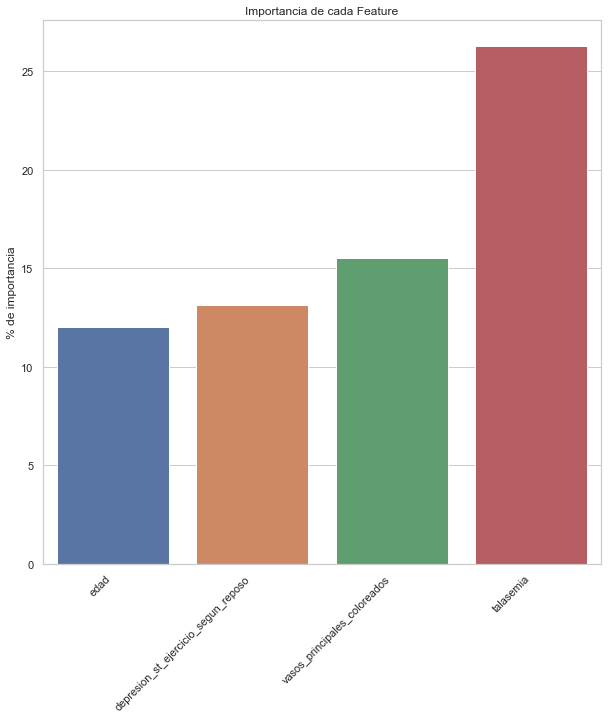

In [48]:
def importances_clear(columnas,importances):
    col = list()
    imp = list()
    for indice in range(len(importances)):
        if importances[indice] >= 0.10:
            col.append(columnas[indice])
            imp.append(importances[indice]*100)
    return col, imp
    
plt.figure(figsize=(10,10))
importances = arbol_de_decision.feature_importances_
columns = X.columns
col, imp = importances_clear(columns,importances)
sns.barplot(col,imp)
plt.title('Importancia de cada Feature')
plt.ylabel('% de importancia')
plt.xticks(rotation=45, ha='right')
plt.show()

**Ahora realizamos la predicción para Test y Train:**

In [49]:
y_train_pred_arbol_dec = arbol_de_decision.predict(X_train_arbol_dec)
y_test_pred_arbol_dec = arbol_de_decision.predict(X_test_arbol_dec)

**En este paso, calculamos el accuracy en Train y Test:**

In [50]:
from sklearn.metrics import accuracy_score

train_accuracy_arbol_dec = accuracy_score(y_train_arbol_dec, y_train_pred_arbol_dec)
test_accuracy_arbol_dec = accuracy_score(y_test_arbol_dec, y_test_pred_arbol_dec)
print(f'El % de aciertos sobre el set de entrenamiento: {round(train_accuracy_arbol_dec,2)}%')
print(f'El % de aciertos sobre el set de evaluación: {round(test_accuracy_arbol_dec,2)}%')

El % de aciertos sobre el set de entrenamiento: 1.0%
El % de aciertos sobre el set de evaluación: 0.99%


**Visualizamos la matriz de confusión:**

Matriz de Confusión del árbol de decisión:
[[141   3]
 [  0 156]]


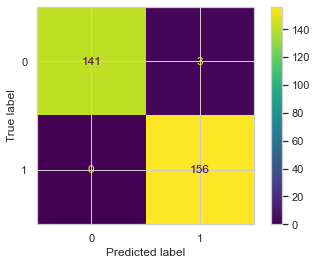

In [51]:
matriz_arbol_dec = confusion_matrix(y_test_arbol_dec, y_test_pred_arbol_dec)
print('Matriz de Confusión del árbol de decisión:')
print(matriz_arbol_dec)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_arbol_dec)
disp.plot()

plt.show()

**A continuación veremos el Reporte de Métricas, con las que hemos explicado al principio del apartado, sobretodo a nivel de conceptos para comprender los números arojados:**

In [52]:
import sklearn.metrics as metrics
print('Reporte de métricas del modelo de Árbol de decisión:')
print(metrics.classification_report(y_test_arbol_dec,y_test_pred_arbol_dec))

Reporte de métricas del modelo de Árbol de decisión:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       144
           1       0.98      1.00      0.99       156

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



**Realizamos el cálculo y el gráfico de la CURVA ROC para el árbol de decisión**

AUC para nuestro modelo de clasificación es: 0.9895833333333333


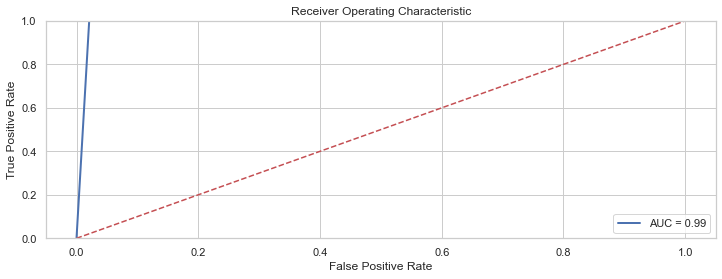

In [53]:
from sklearn.metrics import roc_curve, auc

class_probabilities = arbol_de_decision.predict_proba(X_test_arbol_dec)
preds = class_probabilities[:, 1]
fpr, tpr, threshold = roc_curve(y_test_arbol_dec, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC para nuestro modelo de clasificación es: {roc_auc}")

plt.figure(figsize=(12,4)) 

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc, linewidth=2, markersize=12)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Finalmente graficamos el arbol de decisión:**

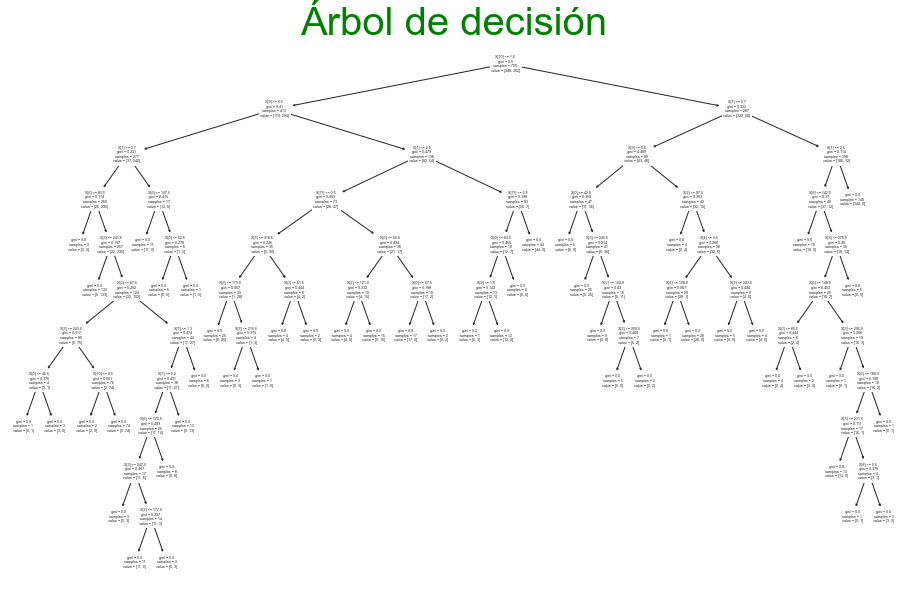

In [54]:
plt.figure(figsize=(16,10)) 
tree.plot_tree(arbol_de_decision.fit(X_train_arbol_dec,y_train_arbol_dec))
plt.title(label="Árbol de decisión",
           fontsize=40,
           color="green")
plt.show()

**18) En segundo lugar aplicaremos el modelo Random Forest:** 🌳🌳🌳

**El Random Forest , combinando Árboles de decisión:** \

> Con el árbol de decisión veíamos qué variables podían predecir una variable objetivo determinada, pero no podíamos saber la importancia de cada variable.
Con Random Forest sí vamos a poder conocer la importancia de cada variable..\

> Pueden tener varias decenas, incluso centenas de árboles, el número de árboles es un parámetro que por lo general, se ajusta mediante validación cruzada (o cross-validation).
Cada árbol se entrena en un subconjunto de la serie de datos y da un resultado (sí o no, en el caso de nuestro ejemplo de la enfermedad cardíaca). Posteriormente, se combinan los resultados de todos los árboles de decisión para dar una respuesta final. Cada árbol “vota” (sí o no) y la respuesta final es la que tenga la mayoría de votos.

>Es lo que se llama un método de bagging:\
Dividimos nuestra serie de datos en varios subconjuntos compuestos aleatoriamente de muestras, de ahí el “random” de random forest.\
Se entrena un modelo en cada subconjunto: habrá tantos modelos como subconjuntos.\
Se combinan todos los resultados de los modelos (con un sistema de voto, por ejemplo) lo que nos da un resultado final.

**De ese modo, se construye un modelo robusto a partir de varios modelos que no tienen por qué ser tan robustos.**


**Entonces ahora si, separamos en Train y Test:**

In [55]:
import numpy as np
X_train_random_forest, X_test_random_forest, y_train_random_forest, y_test_random_forest = train_test_split(X, y, test_size=0.30, random_state=24)
print(f"Train Data: {X_train_random_forest.shape}, {y_train_random_forest.shape}")
print(f"Test Data: {X_test_random_forest.shape}, {y_test_random_forest.shape}")
print(type(y_test_random_forest))
y_test_random_forest = np.asarray(y_test_random_forest)
print(type(y_test_random_forest))

Train Data: (700, 13), (700,)
Test Data: (300, 13), (300,)
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


**Creamos el modelo:**

In [56]:
model = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(X_train_random_forest, y_train_random_forest)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=11)

**Predecimos en test y train:**

In [57]:
y_train_pred_randomF = model.predict(X_train_random_forest)
y_test_pred_randomF = model.predict(X_test_random_forest)

**Cálculo de Accuracy para Test y Train:**

In [58]:
train_accuracy_randomF = accuracy_score(y_train_random_forest, y_train_pred_randomF)
test_accuracy_randomF = accuracy_score(y_test_random_forest, y_test_pred_randomF)
print(f'El % de aciertos sobre el set de entrenamiento: {round(train_accuracy_randomF,2)}%')
print(f'El % de aciertos sobre el set de evaluación: {round(test_accuracy_randomF,2)}%')

El % de aciertos sobre el set de entrenamiento: 1.0%
El % de aciertos sobre el set de evaluación: 0.98%


**Calculamos la matriz de confusión:**

Matriz de Confusión del random forest:
[[138   6]
 [  0 156]]


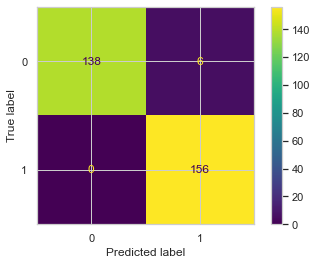

In [59]:
matriz_random_forest = confusion_matrix(y_test_random_forest, y_test_pred_randomF)
print('Matriz de Confusión del random forest:')
print(matriz_random_forest)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_random_forest)
disp.plot()

plt.show()

**Reporte de métricas:**

In [60]:
print('Reporte de métricas del Modelo Random Forest:')
print(metrics.classification_report(y_test_random_forest,y_test_pred_randomF))

Reporte de métricas del Modelo Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       144
           1       0.96      1.00      0.98       156

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



**Realizamos el cálculo y el gráfico de la CURVA ROC para Random Forest**

AUC para nuestro modelo de clasificación es: 0.999599358974359


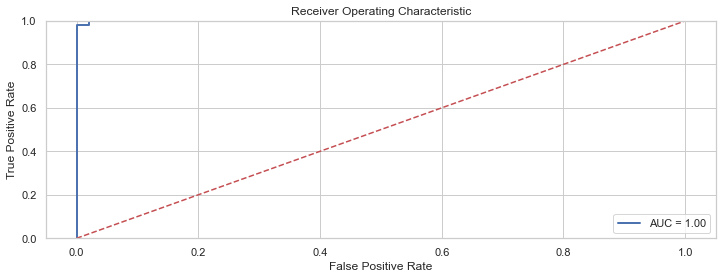

In [61]:
from sklearn.metrics import roc_curve, auc

class_probabilities = model.predict_proba(X_test_random_forest)
preds = class_probabilities[:, 1]
fpr, tpr, threshold = roc_curve(y_test_random_forest, preds)
roc_auc = auc(fpr, tpr)

# AUC
print(f"AUC para nuestro modelo de clasificación es: {roc_auc}")

plt.figure(figsize=(12,4)) 

# Gráfica de la Curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc, linewidth=2, markersize=12)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Por último graficamos el modelo de Random Forest:**

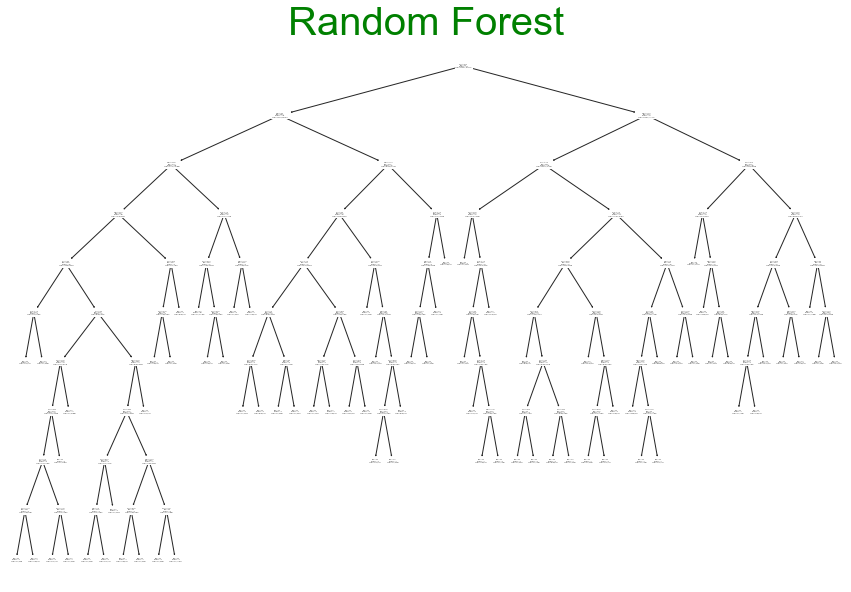

In [62]:
fig = plt.figure(figsize=(15, 10))
tree.plot_tree(model.estimators_[10])
plt.title(label="Random Forest",
           fontsize=40,
           color="green")
plt.show()

**19)En tercer lugar aplicaremos el modelo de regresión logística:**

**¿Qúe y Cómo actúa este modelo?**

> Es un modelo estadístico para estudiar las relaciones entre un conjunto de variables cualitativas Xi y una variable cualitativa Y.\

> A pesar de llamarse así, no es un algoritmo para aplicar en problemas de regresión, en los que se busca un valor continuo, sino que es un método para problemas de clasificación, y obtenemos un valor binario entre 0 y 1. Aplicado en nuestro caso, seria identificar si el paciente posee enfermedad cardíaca o no. Simplificando mucho es identificar si al realizar una afirmación sobre registro esta es cierta o no.

> Para ver la relacion entre las variables utiliza una función logística que determina la probabilidad de la variable dependiente. Como hemos comentado  anteriormente, lo que se busca en estos problemas es una clasificación, por lo que la probabilidad se tiene que traducir en valores binarios. Para lo que se utiliza un valor umbral. Los valores de probabilidad por encima del valor umbral la afirmación es cierta y por debajo es falsa. Generalmente este valor es 0,5, aunque se puede aumentar o reducir para gestionar el número de falsos positivos o falsos negativos.

**Para ello, graficamos un Scatter plot:**

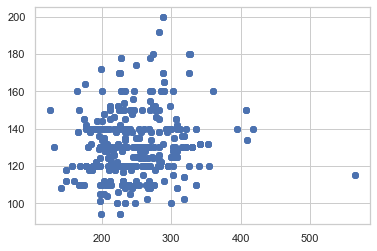

In [63]:
plt.scatter(df_final_heart_disease.colesterol_mg_dl, df_final_heart_disease.presion_en_reposo)
plt.show()

**A continuacion, hacemos la division para train y test de las variables dependientes e independientes:**

In [64]:
X_train_Reg_log, X_test_Reg_log, y_train_Reg_log, y_test_Reg_log = train_test_split(df_final_heart_disease.colesterol_mg_dl, df_final_heart_disease.presion_en_reposo, test_size=0.30)

**Ahora entrenamos el modelo de regresion logistica:**

**El primer paso es crear una instancia de las Regresion logistica:**

In [65]:
regresion_logistica = LogisticRegression()

**El segundo paso es entrenar la regresión logística con los datos de entrenamiento**

In [66]:
regresion_logistica.fit(X_train_Reg_log.values.reshape(-1, 1), y_train_Reg_log.values.reshape(-1, 1).ravel())

C:\Users\doloc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Ahora predecimos:**

In [67]:
y_pred_regresión_log = regresion_logistica.predict(X_test_Reg_log.values.reshape(-1, 1))

**Graficamos el modelo:**

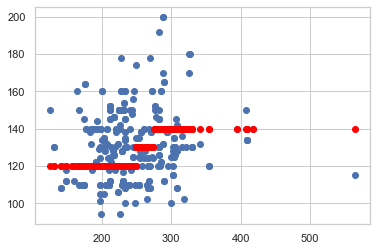

In [68]:
plt.scatter(X_test_Reg_log, y_test_Reg_log)
plt.scatter(X_test_Reg_log, y_pred_regresión_log, c='red')
plt.show()

**Calculamos el accuracy para este modelo:**

In [69]:
accuracy_regresion_log = regresion_logistica.score(X_test_Reg_log.values.reshape(-1, 1), y_test_Reg_log.values.reshape(-1, 1))

In [70]:
print(f"Accuracy = {accuracy_regresion_log}")

Accuracy = 0.12333333333333334


**20) Por último, realizamos el modelo de SVM**

**Explicación modelo de SVM:**

>SVM por sus siglas en inglés (Support Vector Machines), es un algoritmo
que se puede usar tanto para regresión como para problemas de clasificación, aunque se usa más comúnmente como modelo de este último.

>SVM funciona correlacionando datos a un espacio de características de grandes dimensiones de forma que los puntos de datos se puedan categorizar, incluso si los datos no se puedan separar linealmente de otro modo. Se detecta un separador entre las categorías y los datos se transforman de forma que el separador se puede extraer como un hiperplano. Tras ello, las características de los nuevos datos se pueden utilizar para predecir el grupo al que pertenece el nuevo registro.

>Por ejemplo, imagine la siguiente figura, en la que los puntos de datos corresponden a dos categorías diferentes:

<img src=/content/7.png>

>Las dos categorías se pueden separar con una curva, como se muestra en la siguiente figura.

<img src=/content/8.png>

>Tras la transformación, el límite entre las dos categorías se puede definir por un hiperplano, como se muestra en la siguiente figura.

<img src=/content/9.png>

>La función matemática utilizada para la transformación se conoce como función kernel. SVM en IBM® SPSS Modeler admite los siguientes tipos de kernel:

* Lineal
* Polinómico
* Función de base radial (RBF)
* Sigmoide


>Una función kernel lineal es recomendable si la separación lineal de los datos es sencilla. En otros casos, se debe utilizar una del resto de las funciones. Deberá experimentar con las diferentes funciones para obtener el mejor modelo en cada caso, ya que utilizan algoritmos y parámetros diferentes.

**Importamos de la libreria el modelo SVC:**

In [71]:
from sklearn.svm import SVC

**Separamos el dataset en TRAIN y TEST:**

In [72]:
import numpy as np
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.30, random_state=24)
print(f"Train Data: {X_train_svm.shape}, {y_train_svm.shape}")
print(f"Test Data: {X_test_svm.shape}, {y_test_svm.shape}")
print(type(y_test_svm))
y_test_svm = np.asarray(y_test_svm)
print(type(y_test_svm))

Train Data: (700, 13), (700,)
Test Data: (300, 13), (300,)
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


**Creamos el modelo:**

In [73]:
modelo_SVC = SVC(C = 100, kernel = 'linear', random_state=123)
modelo_SVC.fit(X_train_svm, y_train_svm)

SVC(C=100, kernel='linear', random_state=123)

**Realizamos las predicciones:**


In [74]:
y_train_pred_SVC =modelo_SVC.predict(X_train_svm)
y_test_pred_SVC = modelo_SVC.predict(X_test_svm)

**Calculo el accuracy en Train:**

In [75]:
train_accuracy_SVC = accuracy_score(y_train_svm, y_train_pred_SVC)

print('% de aciertos sobre el set de evaluación:',round(train_accuracy_SVC,3))

% de aciertos sobre el set de evaluación: 0.837


**Ahora calculo el accuracy en Test:**

In [76]:
test_accuracy_SVC = accuracy_score(y_test_svm, y_test_pred_SVC)

print('% de aciertos sobre el set de evaluación:',round(test_accuracy_SVC,3))

% de aciertos sobre el set de evaluación: 0.803


**A continuación la matriz de confusión del modelo SVM:**

Matriz de Confusión SVC:
[[ 99  45]
 [ 14 142]]


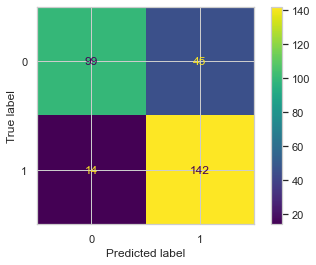

In [77]:
matriz_SVC = confusion_matrix(y_test_svm, y_test_pred_SVC)
print('Matriz de Confusión SVC:')
print(matriz_SVC)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz_SVC)
disp.plot()

plt.show()

**Por último el reporte de métricas:**

In [78]:
print('Reporte de métricas para modelo SVM:')
print(metrics.classification_report(y_test_svm,y_test_pred_SVC))

Reporte de métricas para modelo SVM:
              precision    recall  f1-score   support

           0       0.88      0.69      0.77       144
           1       0.76      0.91      0.83       156

    accuracy                           0.80       300
   macro avg       0.82      0.80      0.80       300
weighted avg       0.82      0.80      0.80       300



**Optimización de métricas:**

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))


scorer = make_scorer(f1_score, pos_label=0)

c_gamma_range = [0.01, 0.1, 1.0, 10.0]


param_grid = [{'svc__C': c_gamma_range,
               'svc__kernel': ['linear']},
              {'svc__C': c_gamma_range,
               'svc__gamma': c_gamma_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train_svm, y_train_svm)
print(gs.best_score_)
print(gs.best_params_)

0.9678336753390907
{'svc__C': 10.0, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


**CONCLUSION ELECCIÓN ALGORITMO: Para la selección del algoritmo nos basamos principalmente en la matriz de confusión. Para resolver el problema planteado de nuestro caso optamos por elegir el modelo RANDOM FOREST ya que tenemos un set de datos con pocos features y registros y también una variable TARGET bien definida (paciente enfermo cardíaco o no), que se optimiza de la mejor manera , con el uso del algoritmo, ya que el mismo nos devuelve un resultado ponderado del promedio de la conjuncción de un conjunto de árboles de decisión.**

**Una vez que hicimos una elección del modelo, vamos a realizar algunas optimizaciones del mismo con el fin de obtener una definición de hiperparámetros eficiente e útil:**

In [81]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import matthews_corrcoef

pre_val = precision_score(y_true=y_test_random_forest, y_pred=y_test_pred_randomF)
print(f'Precision: {pre_val:.3f}')

rec_val = recall_score(y_true=y_test_random_forest, y_pred=y_test_pred_randomF)
print(f'Recall: {rec_val:.3f}')

f1_val = f1_score(y_true=y_test_random_forest, y_pred=y_test_pred_randomF)
print(f'F1: {f1_val:.3f}')


Precision: 0.963
Recall: 1.000
F1: 0.981


# **Hasta aquí finalizamos con el estudio y el análisis de la aplicación de los modelos de Machine learning sobre nuestro problema. Pudimos ver, a modo de conclusión, cuales son los modelos que mejor trabajan sobre las variables de nuestro set de datos, de acuerdo a su composición y de la variable TARGET que debemos predecir.**